In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pymcaspec import specfile

%matplotlib widget

## Proceedure

XAS measured in TEY on La_2CuO_4 from M.P.M. Dean et al., Nature Materials 12, 1019–1023 (2013) 

Compute XAS for La_2CuO_4 Density=7.0, Angle=90.deg using
http://henke.lbl.gov/tmp/xray6982.dat

Scale the pre and post edge to the table values and read-off the values at the peak

Penetration depth at peak 103.6 nm


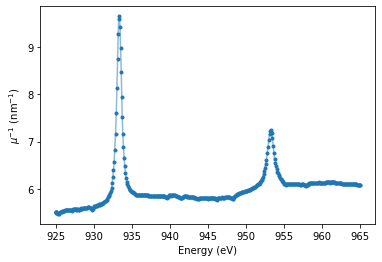

In [5]:
F = specfile("axes_121031_00.spec")
S = F[595]

E = S['ene_st']
TEY = S['zratio']

pre = 1/0.182946
post = 1/ 0.164596

x = E
y = TEY - np.min(TEY)
y = y / np.mean(y[-1:]) * (post-pre)
y = y + pre


fig, ax = plt.subplots()
art, *_ = ax.plot(x, y, '-', alpha=0.5)
ax.plot(x, y, '.', color=art.get_color())
ax.set_xlabel("Energy (eV)")
ax.set_ylabel(r"$\mu^{-1}$ (nm$^{-1}$)")

Determine penetration depth at peak at 1.8 eV below for the dd excitations

In [30]:
peak_penetration = 1000/y.max()
delta_i = peak_penetration

x_res = x[np.argmax(y)]
x_res

choose_inds = np.argmin( (x - (x_res - 1.8))**2 )

pen_at_dds = 1000/y[choose_inds]

print("Penetration depth at peak {:.1f} nm".format(peak_penetration))
print("Penetration depth 1.8 eV below {:.1f} nm".format(pen_at_dds))

Penetration depth at peak 103.6 nm
Penetration depth 1.8 eV below 174.2 nm


In [31]:
def sin(theta):
    return np.sin(theta*np.pi/180)

In [ ]:
comput3e 

In [32]:
tth = 130
lam = 1.2398e4/931
Qtot = 4*np.pi / lam * sin(tth/2)

a = 3.9

del_max = 180-tth
delta = np.linspace(-del_max, del_max, 1000)

H = (Qtot * sin(delta)) / (2*np.pi/a)

th_in =  del_max + delta
th_out = del_max - delta

def self_abs(th_in, th_out, di, do):
    ratio = (di*sin(th_in)) / (do*sin(th_out))
    return 1/(1+ratio)


el_abs = self_abs(th_in, th_out, peak_penetration, peak_penetration)
dd_abs = self_abs(th_in, th_out, peak_penetration, pen_at_dds)

/Users/markdean/anaconda3/envs/pymcaspec/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


/Users/markdean/anaconda3/envs/pymcaspec/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


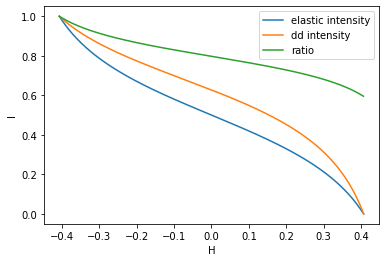

In [33]:
fig, ax = plt.subplots()

ax.plot(H, el_abs, label='elastic intensity')
ax.plot(H, dd_abs, label='dd intensity')
ax.plot(H, el_abs/dd_abs, label='ratio')

ax.set_xlabel('H')
ax.set_ylabel('I')

ax.legend()